In [1]:
import numpy as np
import sys
import os
import time

from scipy.integrate import quad
from scipy.interpolate import CubicSpline
from scipy.interpolate import RegularGridInterpolator
from scipy.optimize import fmin
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt

In [2]:
sys.path.append('/home/jacob/projects/quonium/python')
from config import colr
from config import config
from interpolations import RGRsum
from interpolations import RGRsum2

In [8]:
print(colr('jshdgf',(0,255,255)))

jshdgf


In [9]:
### Baseline for interpolation speed

R: 20
R: 30
R: 40
R: 50
R: 60
R: 70
R: 80
R: 90
R: 100
R: 110
R: 120
R: 130
R: 140
R: 150
R: 160
R: 170
R: 180
R: 190


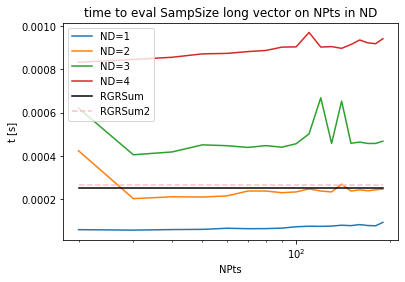

In [13]:
def SF1(x):
    return np.sin(x)
def SF2(x, y):
    return np.sin(x) + np.sin(y)
def SF3(x, y, z):
    return np.sin(x) + np.sin(y) + np.sin(z)
def SF4(x, y, z, z4):
    return np.sin(x) + np.sin(y) + np.sin(z) + np.sin(z4)


### Interpolation time
Nps = []
times = []
SampSize = 1000
SmC = 30
TS = [[],[],[],[]]

for i in range(20,200,10):
    print("R:",i)
    x = np.linspace(0,1,i)
# ND = 1
    data1 = SF1(x)
    i1 = interp1d(x, data1, kind='linear', fill_value='extrapolate') #Interpolation
    r1 = np.random.random(SampSize) # Random points in ND-D space
# ND = 2
    data2 = SF2(x[:,None],x[None,:])
    i2 = RegularGridInterpolator((x, x), data2, method='linear', bounds_error=False, fill_value=None)
    r2 = np.array([np.random.random(SampSize) for j in range(2)])
# ND = 3
    data3 = SF3(x[:,None,None],x[None,:,None],x[None,None,:])
    i3 = RegularGridInterpolator((x, x, x), data3, method='linear', bounds_error=False, fill_value=None)
    r3 = np.array([np.random.random(SampSize) for j in range(3)])
# ND = 4
    data4 = SF4(x[:,None,None,None],x[None,:,None,None],x[None,None,:,None],x[None,None,None,:])
    i4 = RegularGridInterpolator((x, x, x, x), data4, method='linear', bounds_error=False, fill_value=None)
    r4 = np.array([np.random.random(SampSize) for j in range(4)])

    w = 0
    Nps.append(i)
    for pair in ([i1,r1],[i2,r2],[i3,r3],[i4,r4]):
        t1 = time.time()
        for k in range(SmC):
            result = pair[0](pair[1].T)
        t2 = time.time()
        TS[w].append((t2-t1)/SmC)
        w = w+1

### Direct evaluation time

conf = config()
conf['StateList'] = ['1S']
Tx = np.random.random(SampSize)
t3 = time.time()
SmN = 1000
for i in range(SmN):
    result = RGRsum(Tx,Tx,conf,'1S')
t4 = time.time()
DEt = np.ones(len(Nps))*(t4 - t3)/SmN

t5 = time.time()
for i in range(SmN):
    result = RGRsum2(Tx,Tx,Tx,conf,'1S')
t6 = time.time()
DEt2 = np.ones(len(Nps))*(t6 - t5)/SmN
    

X = np.array(Nps)
Y1 = np.array(TS[0])
Y2 = np.array(TS[1])
Y3 = np.array(TS[2])
Y4 = np.array(TS[3])
plt.semilogx(X, Y1, label='ND=1')
plt.semilogx(X, Y2, label='ND=2')
plt.semilogx(X, Y3, label='ND=3')
plt.semilogx(X, Y4, label='ND=4')
plt.semilogx(X, DEt, label='RGRSum', linestyle='-', color='black')
plt.semilogx(X, DEt2, label='RGRSum2', linestyle='--', color='pink')
plt.xlabel('NPts')
plt.ylabel('t [s]')
plt.title('time to eval SampSize long vector on NPts in ND')
plt.legend()
plt.show()

In [ ]:
def OvLp(conf, q , state):
    pr = np.sqrt(conf['M'+state]*(q-conf['E'+state]))
    eta = conf['alphaS']*conf['M'+state]/(4*conf['NC']*pr)
    aB = 2/(conf['alphaS']*conf['CF']*conf['M'+state]) 
    if state == '1S':
        return ( ((2**9)*(np.pi**2)*(eta)*(np.power(aB,7))*(np.power(pr,2))*(1+np.power(eta,2))*np.power(2+eta*aB*pr,2))  /  ((np.power(1+(aB**2)*np.power(pr,2),6))*(np.exp(2*np.pi*eta)-1)) ) * np.exp(4*eta*np.arctan(aB*pr))

    elif state == '2S':
        return 0

In [5]:
2**100

1267650600228229401496703205376

In [7]:
from scipy import integrate

# Define the function to be integrated
def integrand(x, y, z):
    return x**2 + y**2 + z**2  # Replace with your actual function

# Specify the integration limits for each variable
x_limits = [0, 1]
y_limits = [0, 1]
z_limits = [0, 1]

# Perform the numerical integration
result, error = integrate.nquad(integrand, [x_limits, y_limits, z_limits])

# Print the result
print("Numerical integration result:", result)
print("Error estimate:", error)

Numerical integration result: 1.0
Error estimate: 2.5808878251226036e-14


In [ ]:
def RBdist(px, py, pz, M, T):
    return np.exp(-np.sqrt(np.power(M,2) + np.power(px,2) + np.power(py,2) + np.power(pz,2))/T)

def RBdistMag(p, M, T):
    return np.exp(-np.sqrt(np.power(M,2) + np.power(p,2))/T)

def getMomDist(conf, st):
    res, error = nquad(RBdistMag, [0,100], args=(conf['M'+st],conf['T']))
    Nconst = np.power(2*np.pi,3)/res
def rejSRB(M,T):
    while reSamp == False:
        samp = np.random.normal(0,M*T)
        r = np.random.random()
        if samp < np.random.random()

In [3]:
np.random.random()

0.272578514613245